In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Chargement des données AirPassengers
from statsmodels.datasets import get_rdataset
data = get_rdataset('AirPassengers', 'datasets').data

In [3]:
data

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


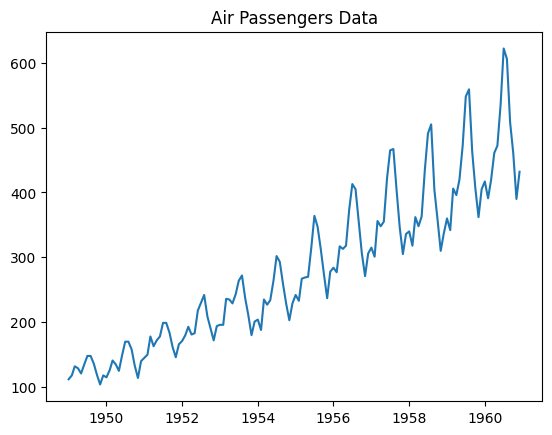

In [5]:
data['Year'] = data['time'].astype(int)
data['Month'] = ((data['time'] - data['Year']) * 12 + 1).round().astype(int)  # convertir les fractions en mois
data['Date'] = pd.to_datetime(data['Year'].astype(str) + '-' + data['Month'].astype(str), format='%Y-%m')

# Maintenant, on peut utiliser 'Date' comme index
data.set_index('Date', inplace=True)
data.drop(['time', 'Year', 'Month'], axis=1, inplace=True)

# Visualiser les données
plt.plot(data)
plt.title("Air Passengers Data")
plt.show()

/home/onyxia/work/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/onyxia/work/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/onyxia/work/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 7842.46340148669


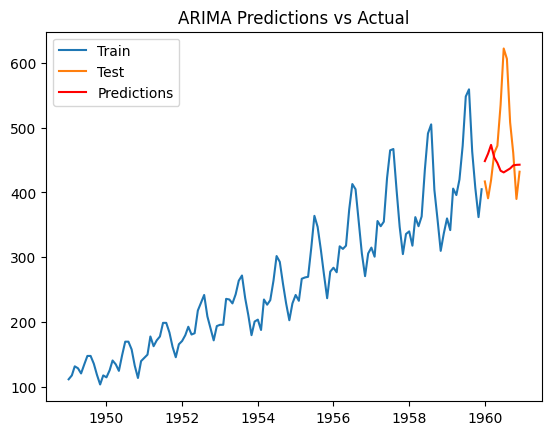

In [6]:
# Définir les données d'entraînement et de test
train_data = data[:'1959']
test_data = data['1960':]

# Ajustement du modèle ARIMA (ordre à ajuster selon les données)
model = ARIMA(train_data, order=(5, 1, 2))
model_fit = model.fit()

# Prédictions sur les données de test
predictions = model_fit.forecast(steps=len(test_data))

# Calcul de l'erreur
mse = mean_squared_error(test_data, predictions)
print(f"Mean Squared Error: {mse}")

# Visualisation des résultats
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.legend()
plt.title("ARIMA Predictions vs Actual")
plt.show()